In [2]:
import keras 

In [126]:
# 가장 기본적인 3가지 콜백 
callbacks_list = [

    # 과대적합 발생 시 조기 스톱 콜백
    #keras.callbacks.EarlyStopping(
        #monitor='val_acc', # 모델 검증 손실 모니터링
        #patience= 20), # 20에폭동안 과대적합 관찰
    
    # 최고의 가중치 자동 저장 콜백
    keras.callbacks.ModelCheckpoint(
        '/Users/kibeomkim/Desktop/models_saved/my_model.h5', 
        monitor = 'val_loss', 
        save_best_only = True), 

    # 학습률 자동 조정 콜백
    keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.1,
        patience=10
    ),

    # 텐서보드 
    keras.callbacks.TensorBoard(
        log_dir = '/Users/kibeomkim/Desktop/my_log_dir',
        histogram_freq = 1, # 1에포크마다 층 출력의 히스토그램 기록
        embeddings_freq = 1
    )
]

# 데이터 상태 점검 

In [32]:
import os 

train_file_numbers = {}

for i in range(0, 20) : 
    train_file_numbers[i] = len(os.listdir(f'/Users/kibeomkim/Desktop/flickr/train/{int(i)}'))

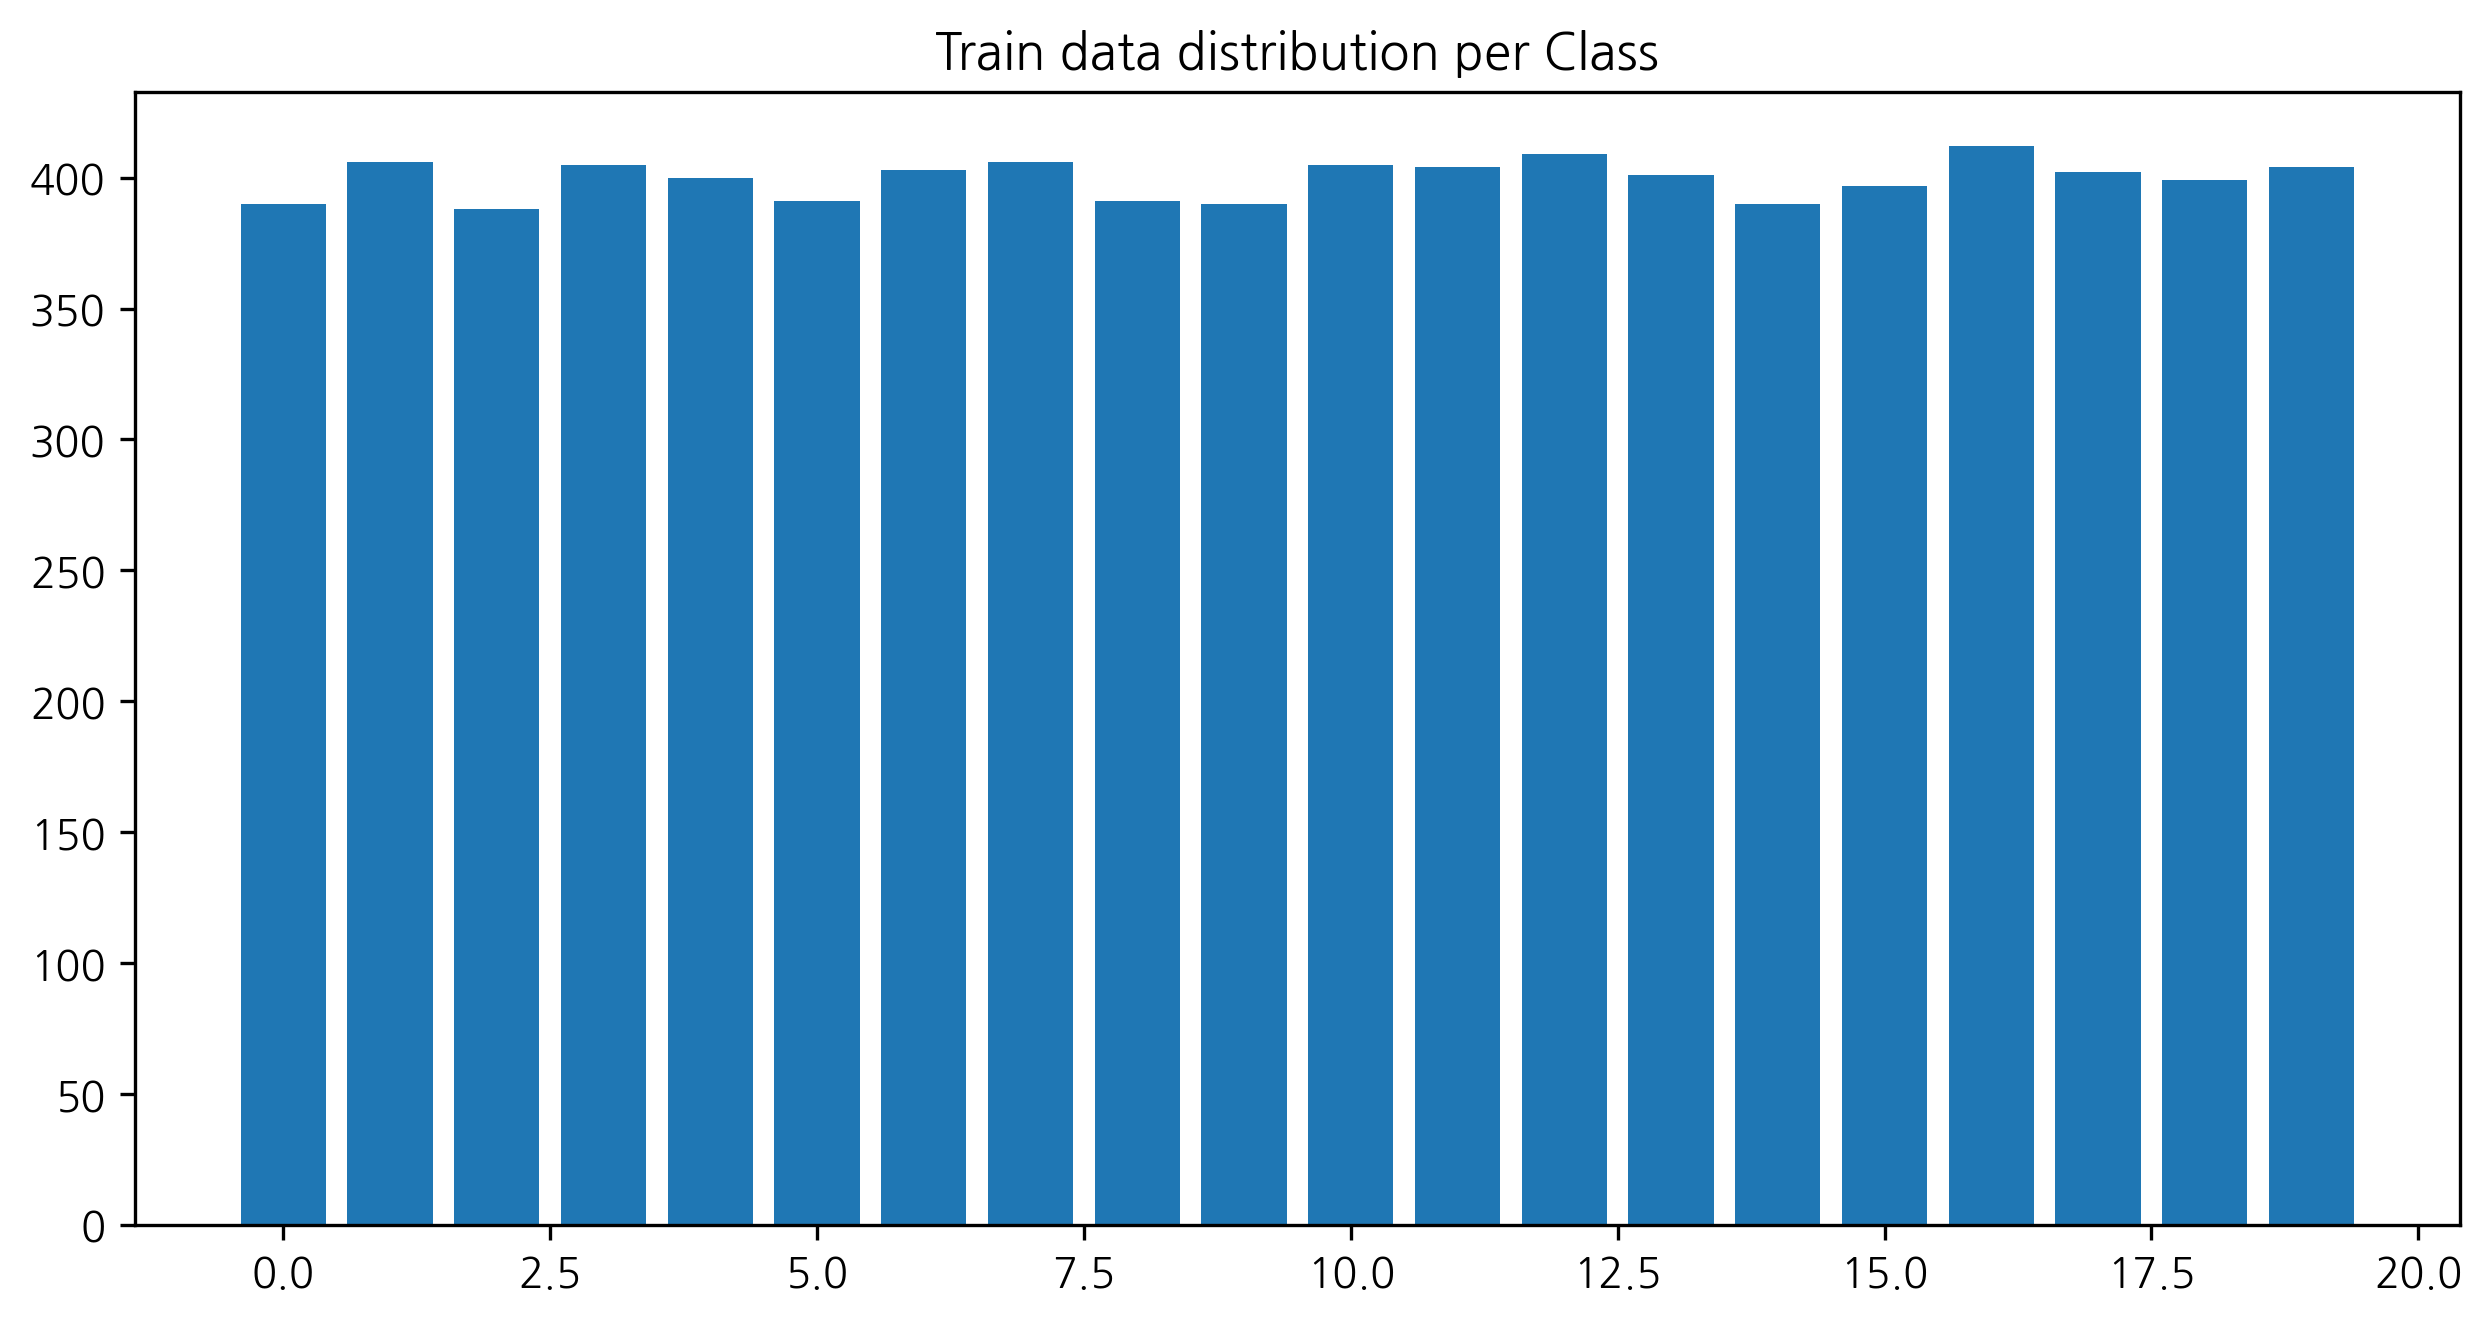

In [50]:
# 훈련데이터 분포 
plt.figure(figsize=(10,5))
plt.bar(train_file_numbers.keys(), train_file_numbers.values())
plt.title('Train data distribution per Class')
plt.show()

In [34]:
test_file_numbers = {}

for i in range(0, 20) : 
    test_file_numbers[i] = len(os.listdir(f'/Users/kibeomkim/Desktop/flickr/test/{int(i)}'))

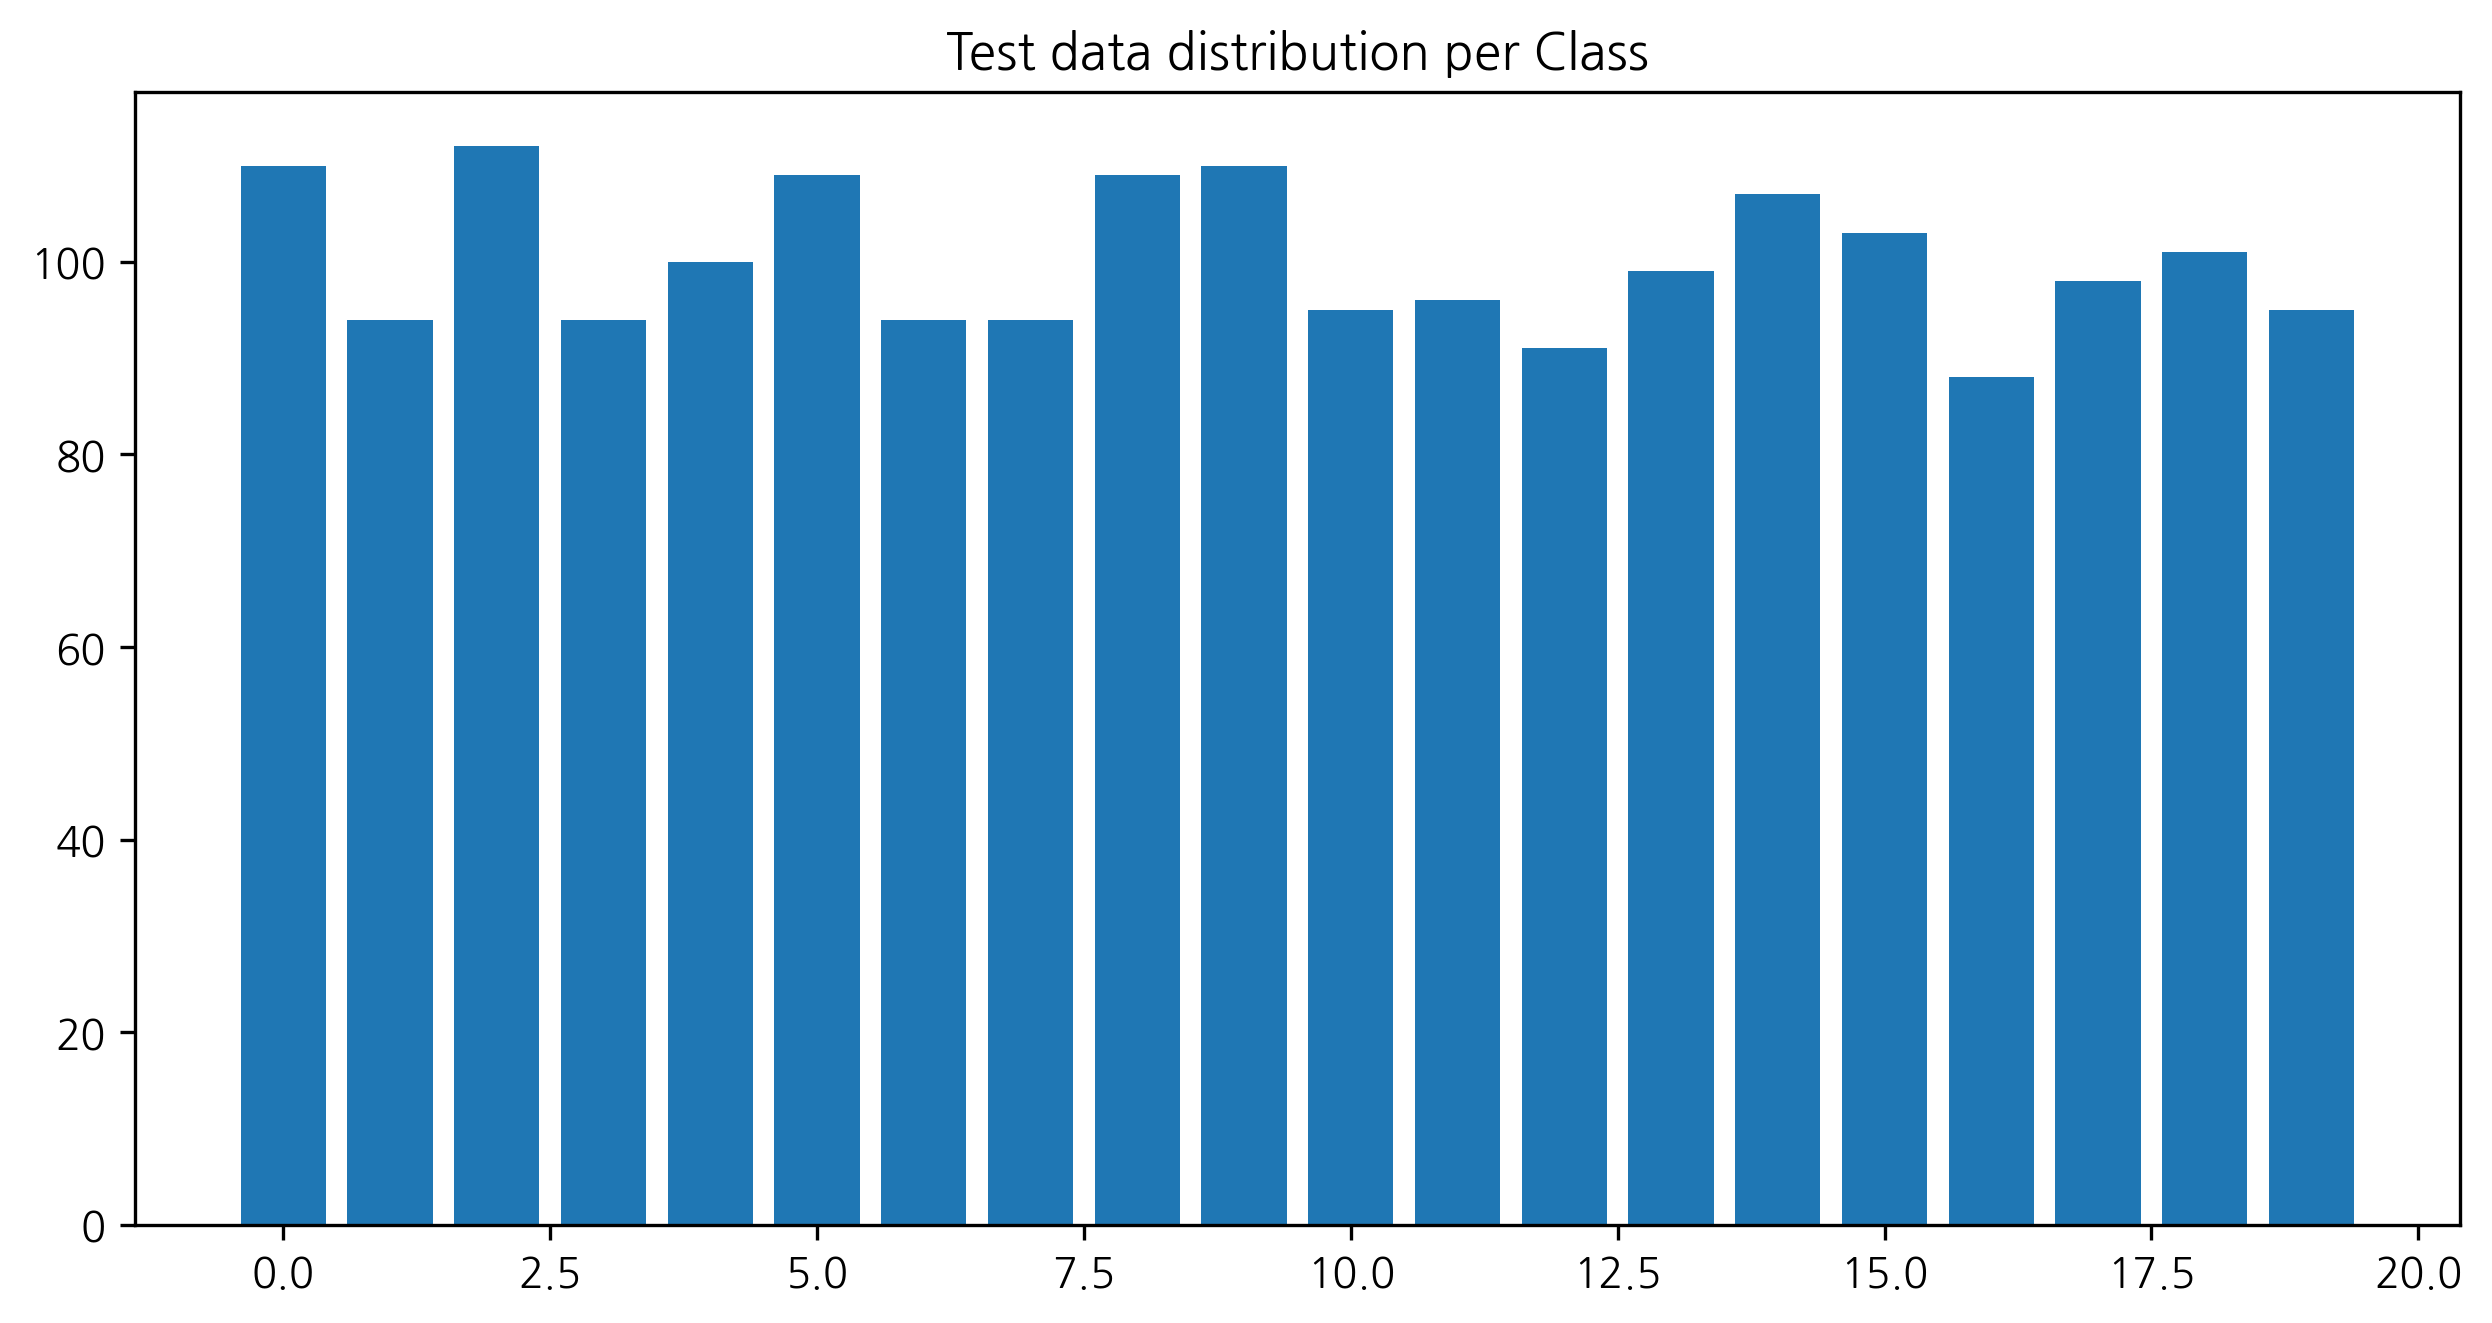

In [55]:
# 검증데이터 분포 
plt.figure(figsize=(10,5))
plt.bar(test_file_numbers.keys(), test_file_numbers.values())
plt.title('Test data distribution per Class')
plt.show()

# 클래스 별로 데이터가 골고루 잘 분포되어 있다. 

# 데이터셋 로드 

In [57]:
# 이미지 데이터 전처리 # 데이터 증식 사용

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255) # 검증데이터는 증식하지 않는다.

train_generator = train_datagen.flow_from_directory(
    '/Users/kibeomkim/Desktop/flickr/train', 
    target_size=(150, 150),
    batch_size=100, 
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    '/Users/kibeomkim/Desktop/flickr/test',
    target_size=(150,150),
    batch_size=50,
    class_mode='categorical'
)

Found 7993 images belonging to 20 classes.
Found 1999 images belonging to 20 classes.


# 모델 설계 

In [127]:
from keras import models 
from keras import layers 

# VGG16 합성곱 기반 층 만들기 

from keras.applications import vgg16
from keras import optimizers

# 합성곱 기반 층
conv_base = vgg16.VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150, 150, 3)
)

# 모델 정의
model = models.Sequential() 
model.add(conv_base)# 합성곱 기반 층
model.add(layers.Flatten()) # 합성곱 기반 층 출력 1차원 텐서(벡터로)변형
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(20, activation='softmax'))

# 합성곱 기반 층 가중치 동결 
conv_base.trainable = False
print(f'{len(model.trainable_weights)}') 


# 모델 컴파일 
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.adam_v2.Adam(learning_rate=0.001),
    metrics=['acc']
)

# 모델 훈련 
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 80, 
    epochs=20, 
    validation_data = validation_generator, 
    validation_steps=40, 
    verbose=2,
    callbacks=callbacks_list
)

8
Epoch 1/20


2022-02-17 00:11:08.244024: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-17 00:11:22.651608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


80/80 - 23s - loss: 3.4938 - acc: 0.1062 - val_loss: 2.7257 - val_acc: 0.1562 - lr: 0.0010 - 23s/epoch - 287ms/step
Epoch 2/20
80/80 - 21s - loss: 3.0001 - acc: 0.1519 - val_loss: 2.5671 - val_acc: 0.2375 - lr: 0.0010 - 21s/epoch - 258ms/step
Epoch 3/20
80/80 - 21s - loss: 2.8143 - acc: 0.1906 - val_loss: 2.4827 - val_acc: 0.2562 - lr: 0.0010 - 21s/epoch - 258ms/step
Epoch 4/20
80/80 - 20s - loss: 2.7326 - acc: 0.2000 - val_loss: 2.4622 - val_acc: 0.2600 - lr: 0.0010 - 20s/epoch - 247ms/step
Epoch 5/20
80/80 - 20s - loss: 2.6027 - acc: 0.2319 - val_loss: 2.3899 - val_acc: 0.2812 - lr: 0.0010 - 20s/epoch - 248ms/step
Epoch 6/20
80/80 - 20s - loss: 2.5740 - acc: 0.2500 - val_loss: 2.3149 - val_acc: 0.2862 - lr: 0.0010 - 20s/epoch - 254ms/step
Epoch 7/20
80/80 - 20s - loss: 2.5129 - acc: 0.2398 - val_loss: 2.3066 - val_acc: 0.3000 - lr: 0.0010 - 20s/epoch - 253ms/step
Epoch 8/20
80/80 - 20s - loss: 2.4442 - acc: 0.2693 - val_loss: 2.2592 - val_acc: 0.3088 - lr: 0.0010 - 20s/epoch - 248ms/

# 미세조정 

In [128]:
# 미세조정 
# 모든 층 동결 해제 
conv_base.trainable = True 

set_trainable = False 
for layer in conv_base.layers : 
    if layer.name == 'block1_conv1' : 
        set_trainable = True 
    if set_trainable : 
        layer.trainable = True 
    else : 
        layer.trainable = False 

In [129]:
# 미세조정 

# 컴파일
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.adam_v2.Adam(learning_rate=0.0001),
    metrics=['acc']
)
# 훈련
history = model.fit_generator(
    train_generator,
    steps_per_epoch=80, 
    epochs=300, 
    validation_data=validation_generator,
    validation_steps=40,
    verbose=2,
    callbacks=callbacks_list 
)

Epoch 1/300


2022-02-17 00:24:48.625129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-02-17 00:25:36.883453: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


80/80 - 57s - loss: 2.7774 - acc: 0.1669 - val_loss: 4.7289 - val_acc: 0.1013 - lr: 1.0000e-04 - 57s/epoch - 710ms/step
Epoch 2/300
80/80 - 53s - loss: 2.6539 - acc: 0.2097 - val_loss: 5.0057 - val_acc: 0.0787 - lr: 1.0000e-04 - 53s/epoch - 660ms/step
Epoch 3/300
80/80 - 53s - loss: 2.5303 - acc: 0.2256 - val_loss: 2.6289 - val_acc: 0.2037 - lr: 1.0000e-04 - 53s/epoch - 657ms/step
Epoch 4/300
80/80 - 52s - loss: 2.4319 - acc: 0.2456 - val_loss: 2.7503 - val_acc: 0.2375 - lr: 1.0000e-04 - 52s/epoch - 645ms/step
Epoch 5/300
80/80 - 50s - loss: 2.5006 - acc: 0.2404 - val_loss: 2.6777 - val_acc: 0.2050 - lr: 1.0000e-04 - 50s/epoch - 629ms/step
Epoch 6/300
80/80 - 50s - loss: 2.4323 - acc: 0.2492 - val_loss: 2.9287 - val_acc: 0.2087 - lr: 1.0000e-04 - 50s/epoch - 629ms/step
Epoch 7/300
80/80 - 50s - loss: 2.4856 - acc: 0.2469 - val_loss: 3.0553 - val_acc: 0.1637 - lr: 1.0000e-04 - 50s/epoch - 624ms/step
Epoch 8/300
80/80 - 50s - loss: 2.3458 - acc: 0.2669 - val_loss: 2.5045 - val_acc: 0.242